# Synthetic data generation with Bayesian Networks

Bayesian networks are probabilistic models and represent conditional dependencies among a set of variables (specifically for the C-MPASS dataset it is between settings and sensors) using a directed acyclic graph (DAG). 

<img src="images/BN.png" width="600"/>


As you can see from the diagram, the network structure G is modeled as DAG where V is the set of nodes representing random variables and E is the set of directed edges representing the conditional dependencies between the variables. Parent nodes (Operational settings) are independent variables and each child node (sensors) vi ∈ V is associated with a probability distribution P (vi | pa(vi)), where pa(vi) denotes the set of parent nodes.


In [52]:
%load_ext autoreload
%autoreload 2
from utils import *
from bn import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
engine_data = get_engine_data()
train_test_sample_size = 10000
df = engine_data.sample(train_test_sample_size)
df

setting1  setting2  setting3      s1      s2       s3       s4     s5  \
16517   25.0048    0.6200      60.0  462.54  536.85  1261.61  1053.05   7.05   
17313   35.0003    0.8400     100.0  449.44  555.97  1364.31  1120.29   5.48   
14230   35.0013    0.8400     100.0  449.44  555.86  1359.69  1126.03   5.48   
27845   42.0021    0.8400     100.0  445.00  549.62  1353.44  1131.46   3.91   
7391    42.0062    0.8407     100.0  445.00  550.17  1359.35  1145.14   3.91   
...         ...       ...       ...     ...     ...      ...      ...    ...   
22206    0.0024    0.0019     100.0  518.67  643.01  1591.80  1401.21  14.62   
43065   25.0071    0.6206      60.0  462.54  536.88  1261.06  1052.68   7.05   
24568   42.0057    0.8407     100.0  445.00  550.08  1356.58  1131.25   3.91   
10757   10.0058    0.2500     100.0  489.05  605.04  1509.56  1307.48  10.52   
41968   42.0020    0.8411     100.0  445.00  549.79  1353.68  1132.92   3.91   

          s6      s7  ...     s12      s13      s14      s15   s16  s17   s18  \
16517   9.03  174.97  ...  164.46  2028.18  7876.85  10.8972  0.02  306  1915   
17313   8.00  194.75  ...  183.14  2388.16  8081.78   9.3136  0.02  332  2223   
14230   8.00  194.15  ...  183.12  2387.99  8060.55   9.3129  0.02  335  2223   
27845   5.72  138.91  ...  130.44  2388.03  8087.97   9.3587  0.02  330  2212   
7391    5.72  137.91  ...  130.19  2387.68  8074.92   9.4519  0.02  334  2212   
...      ...     ...  ...     ...      ...      ...      ...   ...  ...   ...   
22206  21.61  553.53  ...  521.87  2388.10  8134.15   8.4153  0.03  393  2388   
43065   9.03  175.77  ...  164.46  2028.22  7872.14  10.9487  0.02  307  1915   
24568   5.72  138.45  ...  130.52  2387.80  8081.80   9.3894  0.02  331  2212   
10757  15.49  394.55  ...  371.18  2388.16  8121.45   8.6810  0.03  370  2319   
41968   5.71  138.09  ...  130.89  2387.79  8076.86   9.3810  0.02  331  2212   

          s19    s20      s21  
16517   84.93  14.25   8.5453  
17313  100.00  14.83   8.8871  
14230  100.00  14.84   8.9536  
27845  100.00  10.59   6.3775  
7391   100.00  10.53   6.3396  
...       ...    ...      ...  
22206  100.00  38.90  23.2845  
43065   84.93  14.35   8.5169  
24568  100.00  10.70   6.2317  
10757  100.00  28.66  17.0460  
41968  100.00  10.56   6.3573  

[10000 rows x 24 columns]

In [4]:
structure = {
    'setting1': [],
    'setting2': [],
    'setting3': [],
}

for i in range(1, 22):
    structure[f's{i}'] = ['setting1','setting2','setting3']

bn = BayesianNetwork(structure)
bn.fit(df)
synthetic_df = bn.sample(100)


In [5]:
synthetic_df

setting1  setting2    setting3          s1          s2           s3  \
0   34.140495  0.424843  119.730331  477.345001  516.606812  1127.276855   
1   26.589115  0.317841  108.011559  480.319366  515.318604  1129.284180   
2   17.030951  0.658689   95.180450  478.654724  513.214661  1142.401123   
3    6.356629  1.002133   76.959770  487.342865  518.500977  1130.648804   
4   18.387060  0.912246  107.299057  485.898102  509.788635  1137.221558   
..        ...       ...         ...         ...         ...          ...   
95  25.978851  0.476759   85.414955  476.265625  510.950958  1112.501221   
96  51.748928  0.500059   91.465927  487.346954  514.699829  1122.389038   
97  32.544079  0.891162  103.474342  478.315735  518.894226  1126.765869   
98  18.868368  0.540790   60.899010  490.985413  513.953308  1122.980713   
99  15.876621  1.212879  128.825272  492.360199  523.734192  1150.158936   

            s4         s5         s6          s7  ...         s12  \
0   949.652527  11.702616  16.570883  257.241455  ...  200.180664   
1   970.401794  10.980314  13.979507  233.456024  ...  229.344925   
2   984.456360  11.993360  14.198619  232.101883  ...  283.951080   
3   980.844116  11.514179  14.354897  233.572479  ...  229.775177   
4   966.296631  11.770276  13.719516  219.581390  ...  180.852264   
..         ...        ...        ...         ...  ...         ...   
95  972.540161  11.868551  14.989422  243.643265  ...  235.967957   
96  963.564514  10.829900  13.779787  239.603287  ...  227.749573   
97  976.151306  11.219197  13.684088  241.576202  ...  210.228745   
98  977.085999  12.238364  12.397184  243.491119  ...  229.040009   
99  952.801270  11.758392  13.275167  263.699554  ...  236.462997   

            s13          s14        s15       s16         s17          s18  \
0   1488.576660  7606.207520  12.929514  0.022442  273.139099  1460.108398   
1   1489.185059  7627.674316  12.839774  0.024183  278.395721  1463.831909   
2   1489.676880  7629.585938  12.942634  0.022705  273.387024  1471.639404   
3   1489.102783  7645.517578  12.912316  0.023240  273.098999  1473.435181   
4   1489.622681  7610.316895  12.905713  0.023374  269.777924  1458.454712   
..          ...          ...        ...       ...         ...          ...   
95  1488.634766  7629.337891  12.930690  0.024809  275.784180  1453.245728   
96  1489.313965  7604.286133  12.900474  0.023202  272.210571  1466.340820   
97  1488.481812  7616.770996  12.964117  0.026168  270.229187  1457.030762   
98  1490.666870  7655.891113  12.917601  0.023294  278.618378  1456.519653   
99  1489.426758  7631.235352  12.938355  0.025622  273.806854  1459.758423   

          s19        s20        s21  
0   62.352436  20.764517  12.266871  
1   62.366901  20.941887  12.029510  
2   62.311417  20.711510  13.194225  
3   62.359943  19.175739  12.807634  
4   62.331936  21.147886  13.352257  
..        ...        ...        ...  
95  62.345390  19.265186  11.824230  
96  62.344257  18.917175  12.166649  
97  62.346798  20.301046  12.005019  
98  62.323700  21.506107  12.803999  
99  62.347672  18.638512  11.620390  

[100 rows x 24 columns]

In [6]:
from pathlib import Path
metrics_dir = 'metrics'
algo_name = 'bn'
original_df_file = f'{metrics_dir}/original_df.csv'
synthetic_df_file = f'{metrics_dir}/{algo_name}_df.csv'

if Path(original_df_file).is_file():
    original_df = pd.read_csv(original_df_file)
else:
    original_df = engine_data.sample(len(synthetic_df))
    original_df = original_df.reset_index(inplace=False,drop=True)
    original_df.to_csv(original_df_file, index=False,header=True) 

synthetic_df.to_csv(synthetic_df_file, index=False,header=True) 
original_df

setting1  setting2  setting3      s1      s2       s3       s4     s5  \
0    34.9983    0.8400     100.0  449.44  555.78  1363.97  1125.39   5.48   
1    24.9984    0.6200      60.0  462.54  537.01  1256.09  1045.64   7.05   
2    42.0071    0.8401     100.0  445.00  549.81  1352.27  1124.99   3.91   
3     0.0020    0.0000     100.0  518.67  642.81  1589.90  1407.62  14.62   
4     9.9989    0.2517     100.0  489.05  604.29  1496.64  1304.30  10.52   
..       ...       ...       ...     ...     ...      ...      ...    ...   
95   10.0075    0.2507     100.0  489.05  604.94  1499.84  1310.79  10.52   
96   35.0002    0.8404     100.0  449.44  555.52  1363.91  1129.15   5.48   
97   35.0048    0.8400     100.0  449.44  557.03  1376.97  1155.05   5.48   
98   10.0074    0.2517     100.0  489.05  604.93  1509.62  1315.22  10.52   
99   42.0065    0.8400     100.0  445.00  550.16  1352.17  1134.76   3.91   

       s6      s7  ...     s12      s13      s14      s15   s16  s17   s18  \
0    8.00  194.72  ...  182.94  2388.13  8073.91   9.3152  0.02  333  2223   
1    9.03  175.57  ...  165.18  2028.40  7886.30  10.9136  0.02  306  1915   
2    5.71  138.57  ...  130.77  2387.89  8080.70   9.3821  0.02  331  2212   
3   21.61  553.10  ...  521.52  2388.13  8138.29   8.4215  0.03  393  2388   
4   15.49  393.91  ...  371.99  2388.10  8139.17   8.6337  0.03  368  2319   
..    ...     ...  ...     ...      ...      ...      ...   ...  ...   ...   
95  15.49  394.34  ...  371.37  2388.16  8132.50   8.6452  0.03  369  2319   
96   8.00  195.68  ...  183.46  2388.07  8066.44   9.2779  0.02  332  2223   
97   8.01  194.01  ...  182.99  2389.65  8143.37   9.4200  0.02  338  2223   
98  15.49  394.45  ...  371.01  2388.19  8152.99   8.6958  0.03  370  2319   
99   5.72  138.88  ...  130.10  2387.93  8086.71   9.4216  0.02  334  2212   

       s19    s20      s21  
0   100.00  14.72   8.8547  
1    84.93  14.55   8.5935  
2   100.00  10.62   6.4156  
3   100.00  38.97  23.3654  
4   100.00  28.62  17.0607  
..     ...    ...      ...  
95  100.00  28.54  17.0885  
96  100.00  14.87   8.9074  
97  100.00  14.67   8.8234  
98  100.00  28.68  17.1613  
99  100.00  10.44   6.2058  

[100 rows x 24 columns]

In [11]:
real_stats_df, synthetic_stats_df, comparison_stats_df = compute_stats(original_df,synthetic_df)
print("Original data stat")
display(real_stats_df)

print("\nSynthetic stat")
display(synthetic_stats_df)

print("\nComparison:")
display(comparison_stats_df)

Original data stat


Min        Max         Mean         Std
setting1     0.0000    42.0080    21.863409   14.095098
setting2     0.0000     0.8419     0.539277    0.307351
setting3    60.0000   100.0000    94.800000   13.452137
s1         445.0000   518.6700   476.265200   25.222571
s2         536.3100   643.2700   584.522100   36.014661
s3        1247.0600  1597.7700  1433.442300  102.663913
s4        1040.5100  1418.2100  1220.112700  115.103377
s5           3.9100    14.6200     8.486500    3.421230
s6           5.7100    21.6100    12.294100    5.165116
s7         137.9500   555.4200   301.459000  139.818840
s8        1915.1000  2388.2000  2243.457400  139.901365
s9        8001.7000  9107.0200  8570.571700  325.164306
s10          0.9400     1.3000     1.111900    0.128908
s11         36.3500    47.7800    43.326000    3.115025
s12        130.1000   523.1800   283.832800  131.869406
s13       2027.9300  2389.6500  2341.361200  120.961806
s14       7852.4400  8188.4900  8075.391200   81.441890
s15          8.3737    11.0145     9.257105    0.740894
s16          0.0200     0.0300     0.023900    0.004877
s17        305.0000   397.0000   351.950000   26.693585
s18       1915.0000  2388.0000  2243.380000  140.049833
s19         84.9300   100.0000    98.040900    5.068093
s20         10.4400    39.0400    22.088500    9.446593
s21          6.2058    23.4341    13.267902    5.669591


Synthetic stat


Min          Max         Mean        Std
setting1    -3.021688    55.977707    24.181667  13.429211
setting2    -0.033752     1.397931     0.596639   0.293306
setting3    60.899010   128.825272    92.964348  14.647657
s1         474.811493   499.673584   485.805481   5.186162
s2         498.143250   529.647522   513.768005   6.335170
s3        1092.321045  1158.431641  1130.342285  13.079321
s4         929.107605  1005.550476   973.791199  14.297354
s5          10.716469    13.041504    11.824784   0.468609
s6          12.397184    16.570883    14.130693   0.727846
s7         210.934204   298.101929   245.180267  17.304951
s8        1437.070679  1498.805786  1464.409424  13.123233
s9        7479.604492  7685.937988  7582.627441  47.668037
s10          0.882124     0.946359     0.913279   0.013354
s11         28.858225    30.763355    29.736443   0.398015
s12        180.852264   283.951080   228.859283  18.825298
s13       1487.542236  1490.666870  1489.259033   0.610859
s14       7584.075195  7656.893555  7620.707520  15.467224
s15         12.782718    13.034679    12.917127   0.042278
s16          0.019282     0.028714     0.023689   0.001739
s17        262.488708   287.600159   273.475708   3.934964
s18       1434.057251  1500.459473  1463.979248  11.539970
s19         62.273106    62.411743    62.349464   0.023130
s20         17.453766    22.692150    20.204655   1.128484
s21         10.446085    13.546116    12.192666   0.576193


Comparison:


KLD Mean     WD Mean
Comparison  0.395654  196.681909

In [12]:
kl_divs = kld(original_df,synthetic_df)
kl_divs

[{'setting1': 0.015658654272556305},
 {'setting2': 0.019363239407539368},
 {'setting3': 0.016896329820156097},
 {'s1': 1.1737035512924194},
 {'s2': 3.163792133331299},
 {'s3': 5.883155822753906},
 {'s4': 3.860379219055176},
 {'s5': 1.968656301498413},
 {'s6': 1.532106637954712},
 {'s7': 1.6772117614746094},
 {'s8': 17.220298767089844},
 {'s9': 6.000270843505859},
 {'s10': 2.947803020477295},
 {'s11': 10.986573219299316},
 {'s12': 1.5428249835968018},
 {'s13': 29.351974487304688},
 {'s14': 16.60788917541504},
 {'s15': 14.44503402709961},
 {'s16': 0.5957971811294556},
 {'s17': 5.703442096710205},
 {'s18': 17.330272674560547},
 {'s19': 29.43915367126465},
 {'s20': 1.6515995264053345},
 {'s21': 1.8093969821929932}]

In [13]:
#provides statstic and p value for each field
ks_test(original_df,synthetic_df)

[{'setting1': (0.23, 0.009878183186176536)},
 {'setting2': (0.25, 0.0037294923618311367)},
 {'setting3': (0.53, 3.35710076793659e-13)},
 {'s1': (0.46, 6.422179651064002e-10)},
 {'s2': (1.0, 2.2087606931995054e-59)},
 {'s3': (1.0, 2.2087606931995054e-59)},
 {'s4': (1.0, 2.2087606931995054e-59)},
 {'s5': (0.86, 2.6058774037713476e-38)},
 {'s6': (0.46, 6.422179651064002e-10)},
 {'s7': (0.54, 1.0245697148897385e-13)},
 {'s8': (1.0, 2.2087606931995054e-59)},
 {'s9': (1.0, 2.2087606931995054e-59)},
 {'s10': (0.99, 4.417521386399011e-57)},
 {'s11': (1.0, 2.2087606931995054e-59)},
 {'s12': (0.54, 1.0245697148897385e-13)},
 {'s13': (1.0, 2.2087606931995054e-59)},
 {'s14': (1.0, 2.2087606931995054e-59)},
 {'s15': (1.0, 2.2087606931995054e-59)},
 {'s16': (0.59, 1.7671447393730104e-16)},
 {'s17': (1.0, 2.2087606931995054e-59)},
 {'s18': (1.0, 2.2087606931995054e-59)},
 {'s19': (1.0, 2.2087606931995054e-59)},
 {'s20': (0.54, 1.0245697148897385e-13)},
 {'s21': (0.54, 1.0245697148897385e-13)}]

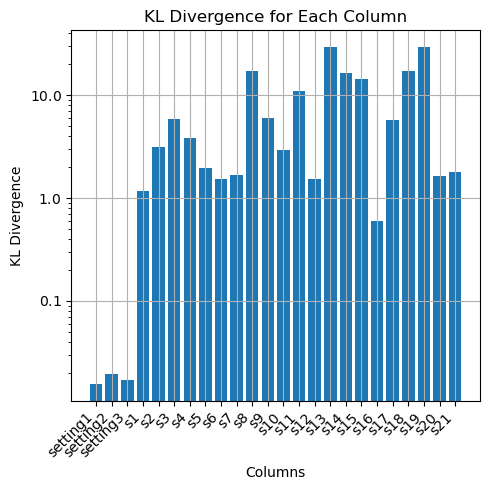

In [14]:
show_n_save(algo_name,'kld',original_df, synthetic_df)

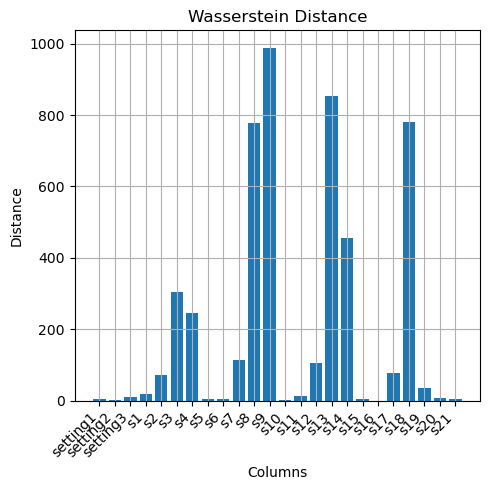

In [15]:
show_n_save(algo_name,'wd',original_df, synthetic_df)

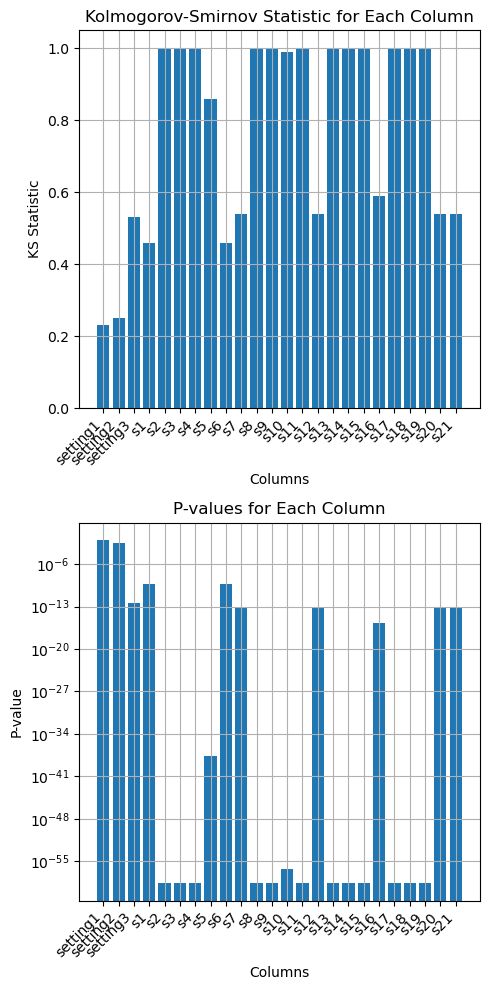

In [16]:
show_n_save(algo_name,'ks_test',original_df, synthetic_df)

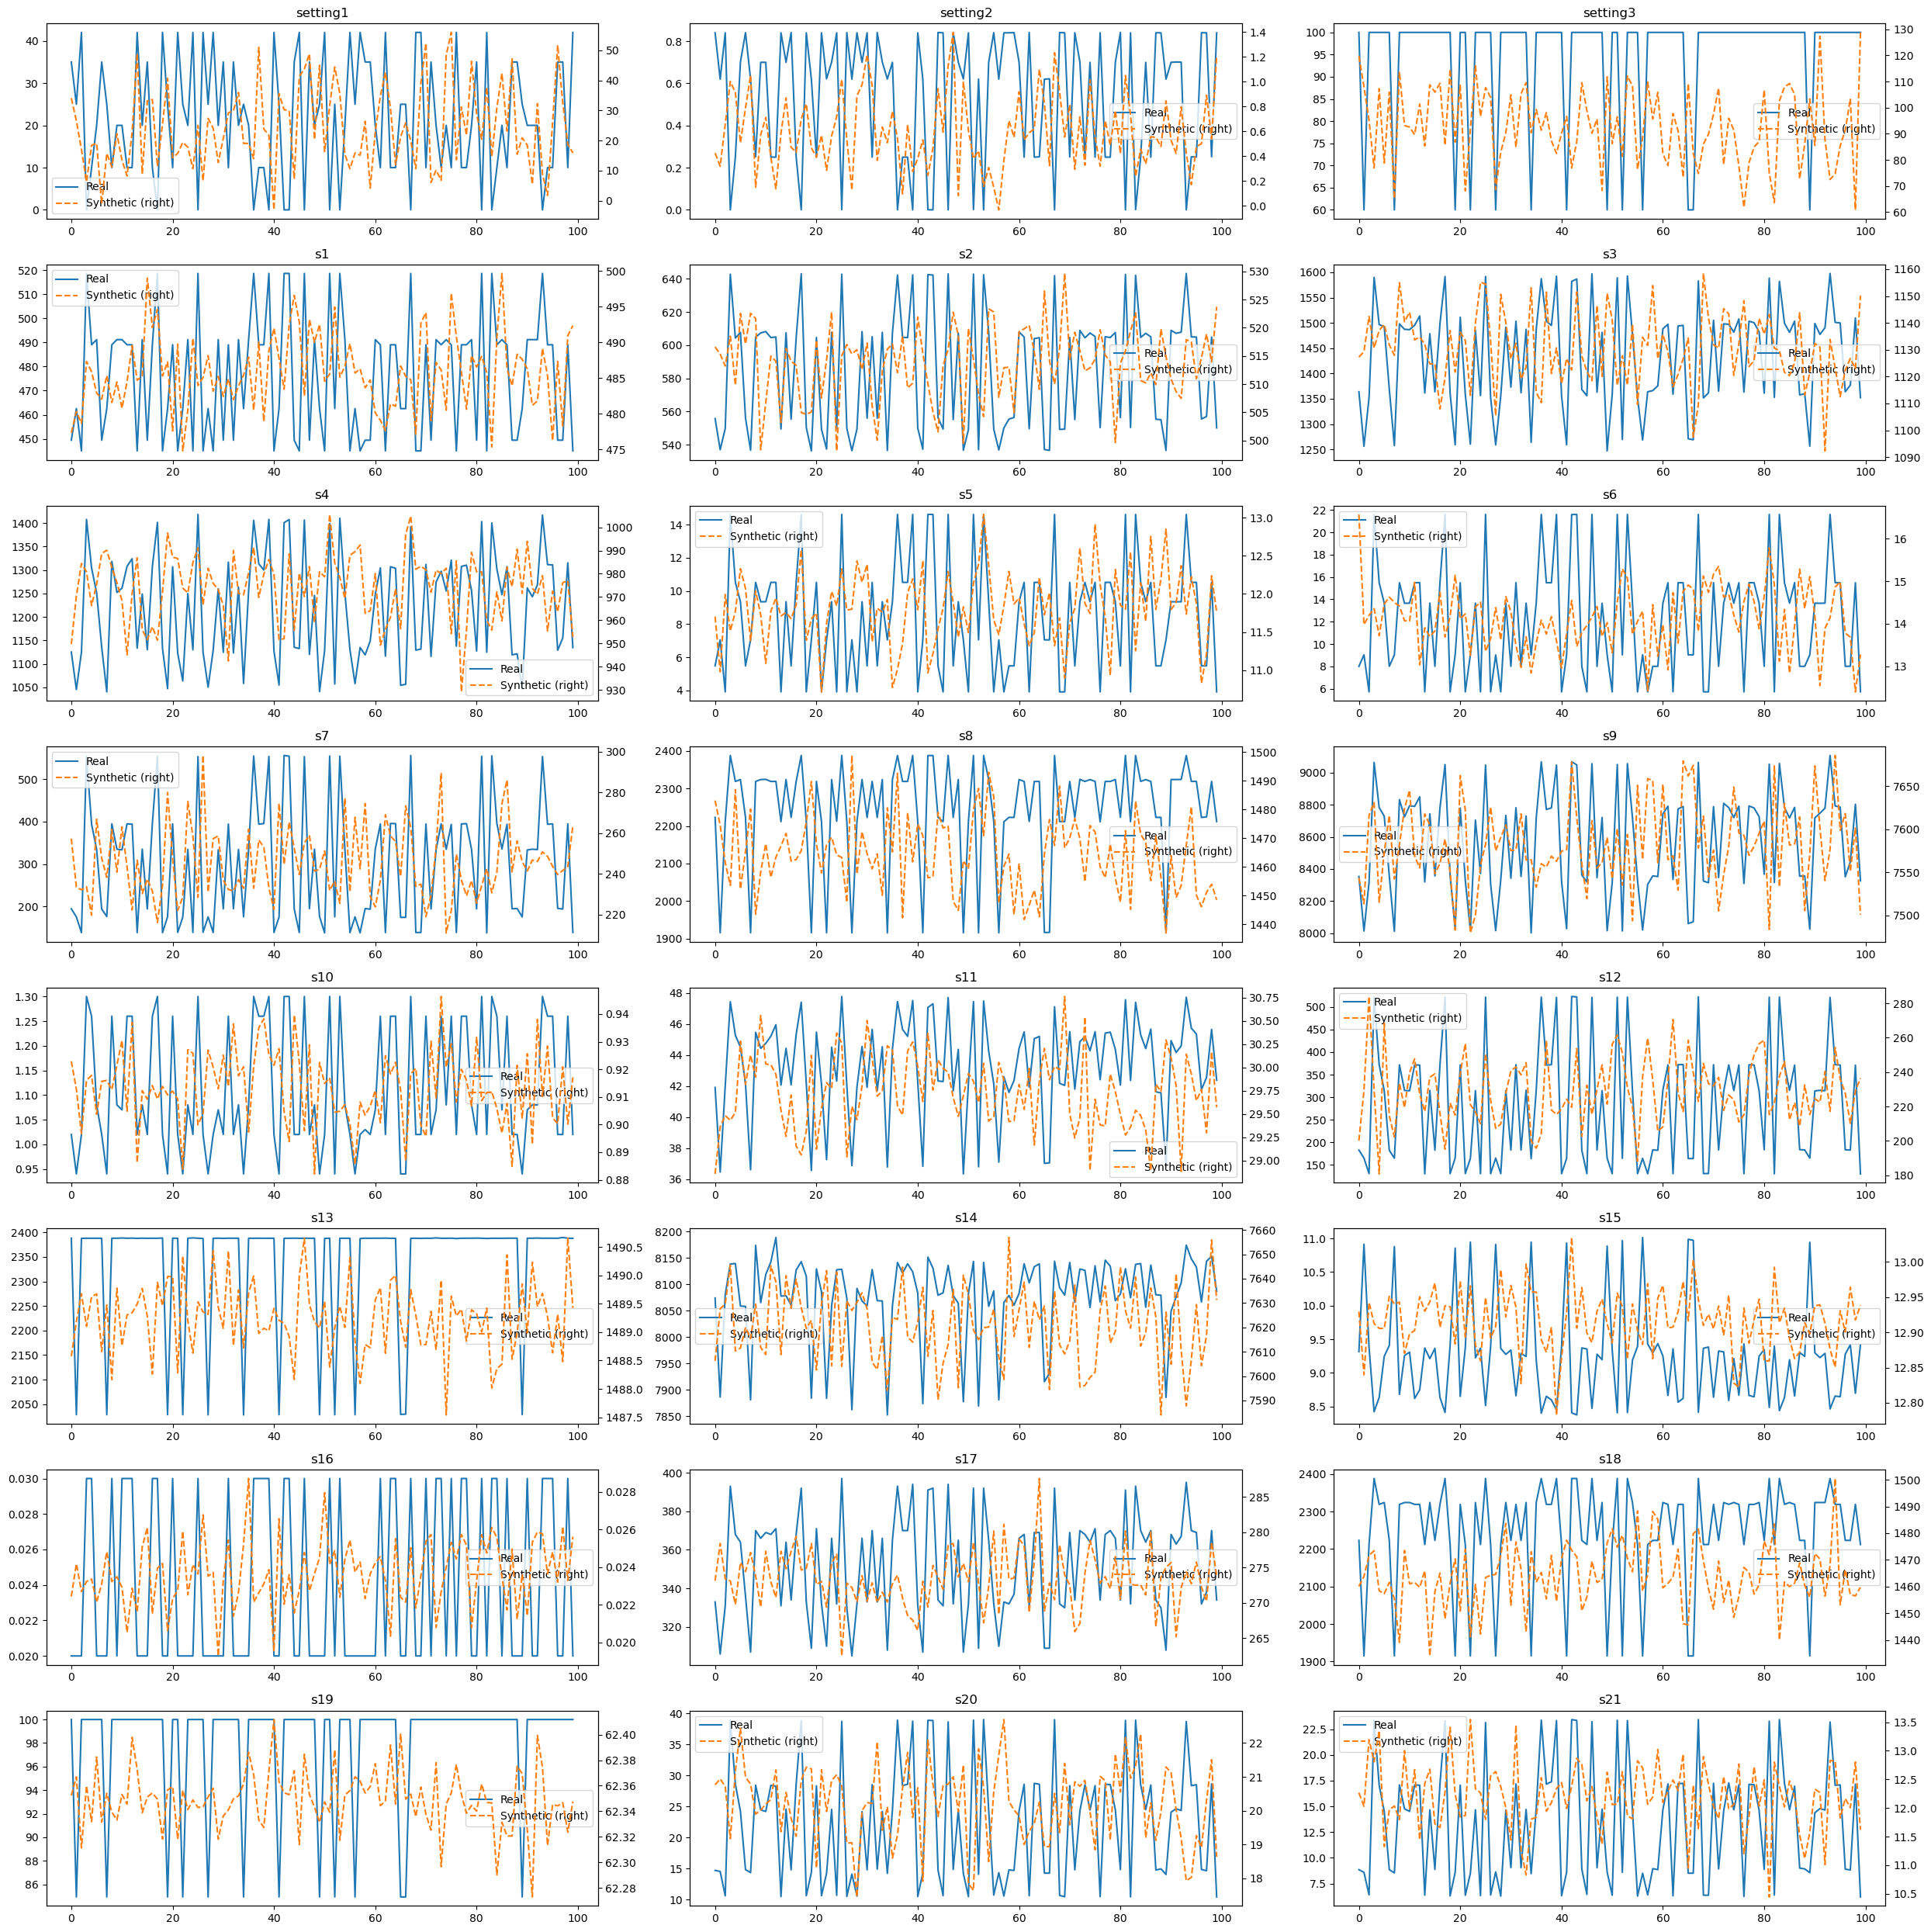

In [17]:
show_n_save(algo_name,'distribs',original_df, synthetic_df)

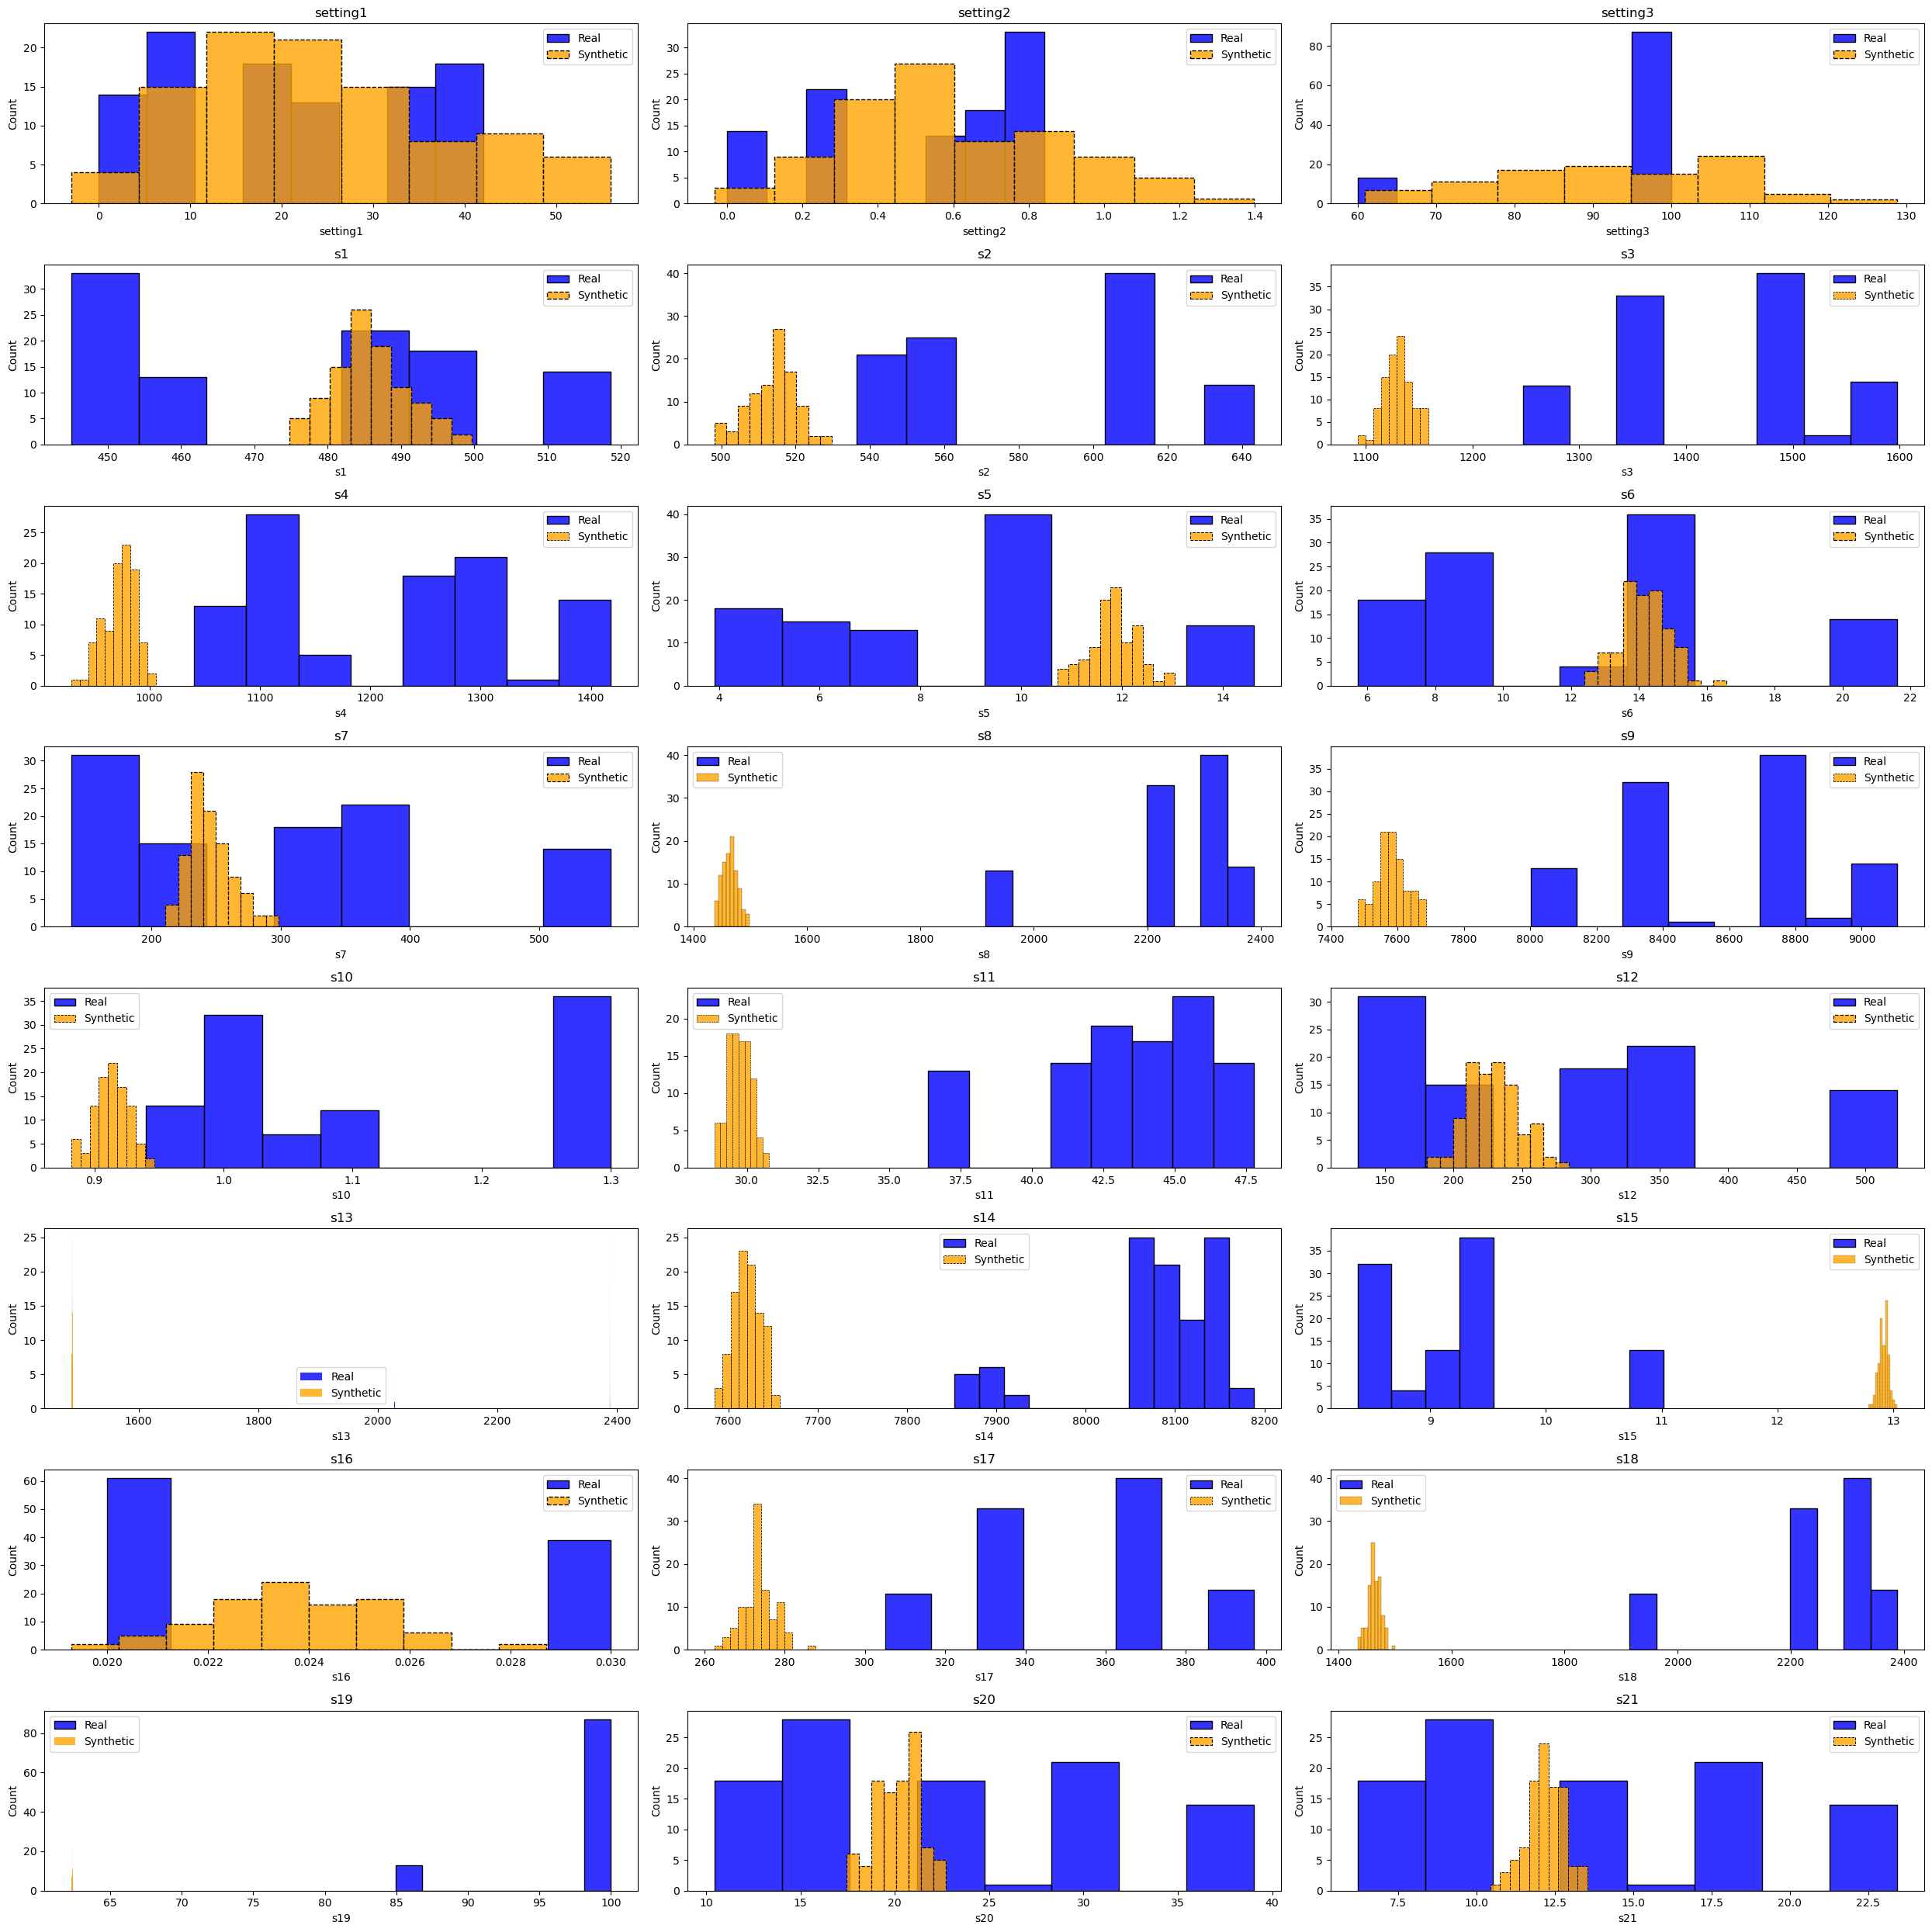

In [18]:
show_n_save(algo_name,'hist',original_df, synthetic_df)

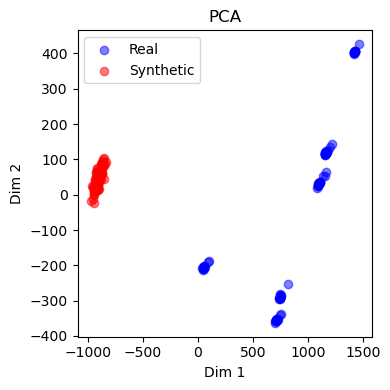

In [19]:
show_n_save(algo_name,'pca',original_df, synthetic_df)

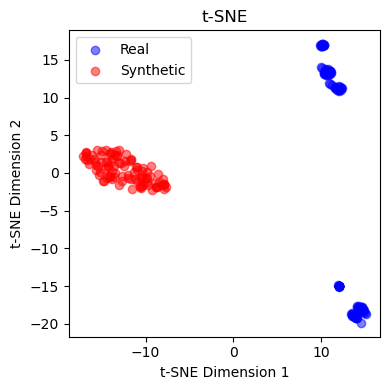

In [20]:
show_n_save(algo_name,'tsne',original_df, synthetic_df)

## pgmPy

In [ ]:
!pip install pgmpy

In [37]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator
from pgmpy.sampling import BayesianModelSampling

pgmpy_model = BayesianNetwork()

for i in range(1, 22):
    pgmpy_model.add_edge('setting1', f's{i}')
    pgmpy_model.add_edge('setting2', f's{i}')
    pgmpy_model.add_edge('setting3', f's{i}')

#estimator = BayesianEstimator(pgmpy_model, df)
pgmpy_model.fit(df, estimator=BayesianEstimator)

In [38]:
sampled_data = BayesianModelSampling(pgmpy_model).forward_sample(size=100)
synthetic_df = pd.DataFrame(sampled_data, columns=reqd_cols)


  0%|          | 0/24 [00:00<?, ?it/s]

In [39]:
synthetic_df

setting1  setting2  setting3      s1      s2       s3       s4     s5  \
0    34.9989    0.7000     100.0  491.19  643.41  1504.17  1423.06   9.35   
1    10.0006    0.8400     100.0  449.44  556.25  1355.14  1246.77   9.35   
2    42.0027    0.2500     100.0  491.19  607.20  1487.08  1135.50   3.91   
3    20.0025    0.0007      60.0  462.54  604.39  1255.54  1124.86   7.05   
4     9.9999    0.8411     100.0  449.44  555.82  1373.77  1408.51  10.52   
..       ...       ...       ...     ...     ...      ...      ...    ...   
95   20.0015    0.0016     100.0  462.54  537.03  1501.85  1403.87   7.05   
96   34.9985    0.2516     100.0  489.05  537.85  1255.84  1130.05   7.05   
97   25.0041    0.0000     100.0  518.67  603.97  1357.92  1313.64  10.52   
98    0.0014    0.0002     100.0  518.67  642.58  1586.31  1404.03  14.62   
99    0.0019    0.2503      60.0  445.00  603.92  1349.18  1127.02   3.91   

       s6      s7  ...     s12      s13      s14      s15   s16  s17   s18  \
0   13.66  552.37  ...  183.11  2387.53  8116.82  10.9680  0.02  365  2223   
1    9.03  139.23  ...  129.71  2390.09  8137.35  10.8820  0.03  371  2324   
2    5.71  138.96  ...  313.82  2387.88  8121.05   9.2287  0.02  388  2324   
3    8.01  137.80  ...  519.38  2027.90  8074.08   8.7495  0.03  395  2319   
4   13.65  394.11  ...  130.83  2388.43  8127.97   9.4388  0.03  366  2223   
..    ...     ...  ...     ...      ...      ...      ...   ...  ...   ...   
95   9.03  175.26  ...  130.91  2029.60  8075.42   8.4599  0.02  309  2388   
96  13.66  554.63  ...  314.67  2389.77  8140.42   9.1832  0.02  392  2319   
97   8.00  193.39  ...  522.90  2387.58  8089.24   9.3784  0.02  327  2388   
98  21.61  553.40  ...  521.86  2388.13  8123.49   8.4417  0.03  393  2388   
99  21.60  175.90  ...  164.10  2387.39  8132.01   9.4212  0.02  371  2223   

       s19    s20      s21  
0   100.00  10.54  17.0685  
1    84.93  10.44   6.3391  
2   100.00  24.83  23.2600  
3   100.00  38.65   8.5843  
4   100.00  24.48   6.2592  
..     ...    ...      ...  
95   84.93  28.74  23.4306  
96   84.93  38.88   9.0101  
97   84.93  28.70   8.8530  
98  100.00  38.91  23.2639  
99  100.00  24.64   8.6143  

[100 rows x 24 columns]

In [40]:
real_stats_df, synthetic_stats_df, comparison_stats_df = compute_stats(original_df,synthetic_df)
print("Original data stat")
display(real_stats_df)

print("\nSynthetic stat")
display(synthetic_stats_df)

print("\nComparison:")
display(comparison_stats_df)

Original data stat


Min        Max         Mean         Std
setting1     0.0000    42.0080    21.863409   14.095098
setting2     0.0000     0.8419     0.539277    0.307351
setting3    60.0000   100.0000    94.800000   13.452137
s1         445.0000   518.6700   476.265200   25.222571
s2         536.3100   643.2700   584.522100   36.014661
s3        1247.0600  1597.7700  1433.442300  102.663913
s4        1040.5100  1418.2100  1220.112700  115.103377
s5           3.9100    14.6200     8.486500    3.421230
s6           5.7100    21.6100    12.294100    5.165116
s7         137.9500   555.4200   301.459000  139.818840
s8        1915.1000  2388.2000  2243.457400  139.901365
s9        8001.7000  9107.0200  8570.571700  325.164306
s10          0.9400     1.3000     1.111900    0.128908
s11         36.3500    47.7800    43.326000    3.115025
s12        130.1000   523.1800   283.832800  131.869406
s13       2027.9300  2389.6500  2341.361200  120.961806
s14       7852.4400  8188.4900  8075.391200   81.441890
s15          8.3737    11.0145     9.257105    0.740894
s16          0.0200     0.0300     0.023900    0.004877
s17        305.0000   397.0000   351.950000   26.693585
s18       1915.0000  2388.0000  2243.380000  140.049833
s19         84.9300   100.0000    98.040900    5.068093
s20         10.4400    39.0400    22.088500    9.446593
s21          6.2058    23.4341    13.267902    5.669591


Synthetic stat


Min        Max         Mean         Std
setting1     0.0001    42.0079    22.022747   14.665361
setting2     0.0000     0.8418     0.544783    0.308938
setting3    60.0000   100.0000    93.200000   15.025312
s1         445.0000   518.6700   479.435200   25.722438
s2         536.1300   643.9500   585.899300   38.382291
s3        1252.2800  1597.1600  1403.191700  106.332400
s4        1037.4300  1427.8300  1239.465000  129.803251
s5           3.9100    14.6200     8.808500    3.447726
s6           5.7100    21.6100    12.670500    5.300964
s7         137.7800   554.6300   298.640800  151.538922
s8        1914.9200  2388.2800  2192.789600  144.635000
s9        8001.0500  9104.1100  8544.508700  359.660748
s10          0.9300     1.3000     1.105600    0.126778
s11         36.2900    48.3200    43.605800    3.635888
s12        129.6400   523.0300   310.437500  149.492481
s13       2027.7600  2390.0900  2280.493500  164.890880
s14       7866.2600  8196.3400  8065.700500   82.299771
s15          8.3688    11.0085     9.366696    0.764601
s16          0.0200     0.0300     0.025100    0.004999
s17        304.0000   398.0000   353.410000   31.264067
s18       1915.0000  2388.0000  2234.640000  133.342230
s19         84.9300   100.0000    93.670600    7.437927
s20         10.3000    39.0800    24.307200   10.010114
s21          6.2093    23.4306    13.239880    6.301809


Comparison:


KLD Mean    WD Mean
Comparison  0.842807  12.196494

In [43]:
algo_name = 'bn_pgmpy'

In [51]:
synthetic_df_file = f'{metrics_dir}/{algo_name}_df.csv'
synthetic_df.to_csv(synthetic_df_file, index=False,header=True) 

In [41]:
kl_divs = kld(original_df,synthetic_df)
kl_divs

[{'setting1': 0.0016786903142929077},
 {'setting2': 0.00018544867634773254},
 {'setting3': 0.020188719034194946},
 {'s1': 0.008209438994526863},
 {'s2': 0.004955418407917023},
 {'s3': 0.044239189475774765},
 {'s4': 0.029668226838111877},
 {'s5': 0.004444641526788473},
 {'s6': 0.003314487636089325},
 {'s7': 0.007042698562145233},
 {'s8': 0.06605905294418335},
 {'s9': 0.014066196978092194},
 {'s10': 0.0014569684863090515},
 {'s11': 0.030566975474357605},
 {'s12': 0.037284404039382935},
 {'s13': 0.24463793635368347},
 {'s14': 0.007118583656847477},
 {'s15': 0.011843666434288025},
 {'s16': 0.030577529221773148},
 {'s17': 0.02931305766105652},
 {'s18': 0.004259657114744186},
 {'s19': 0.5613686442375183},
 {'s20': 0.03079637885093689},
 {'s21': 0.01201997697353363}]

In [42]:
#provides statstic and p value for each field
ks_test(original_df,synthetic_df)

[{'setting1': (0.11, 0.5830090612540064)},
 {'setting2': (0.04, 0.999998821968263)},
 {'setting3': (0.04, 0.999998821968263)},
 {'s1': (0.08, 0.9084105017744525)},
 {'s2': (0.11, 0.5830090612540064)},
 {'s3': (0.17, 0.11119526053829192)},
 {'s4': (0.15, 0.21117008625127576)},
 {'s5': (0.07, 0.9684099261397212)},
 {'s6': (0.1, 0.7020569828664881)},
 {'s7': (0.12, 0.469506448503778)},
 {'s8': (0.29, 0.0004117410017938115)},
 {'s9': (0.13, 0.36818778606286096)},
 {'s10': (0.12, 0.469506448503778)},
 {'s11': (0.15, 0.21117008625127576)},
 {'s12': (0.14, 0.2819416298082479)},
 {'s13': (0.3, 0.0002248739317492479)},
 {'s14': (0.17, 0.11119526053829192)},
 {'s15': (0.15, 0.21117008625127576)},
 {'s16': (0.12, 0.469506448503778)},
 {'s17': (0.19, 0.05390207893129876)},
 {'s18': (0.12, 0.469506448503778)},
 {'s19': (0.29, 0.0004117410017938115)},
 {'s20': (0.14, 0.2819416298082479)},
 {'s21': (0.1, 0.7020569828664881)}]

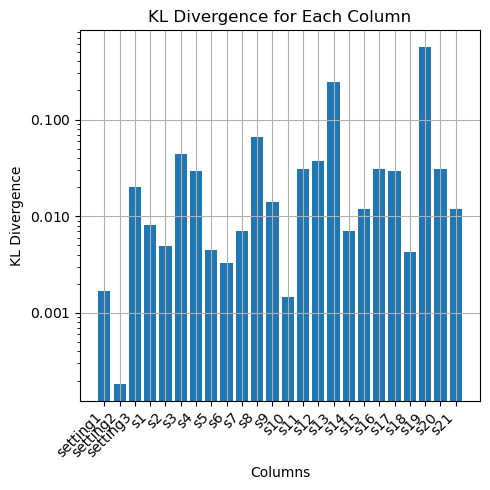

In [44]:
show_n_save(algo_name,'kld',original_df, synthetic_df)

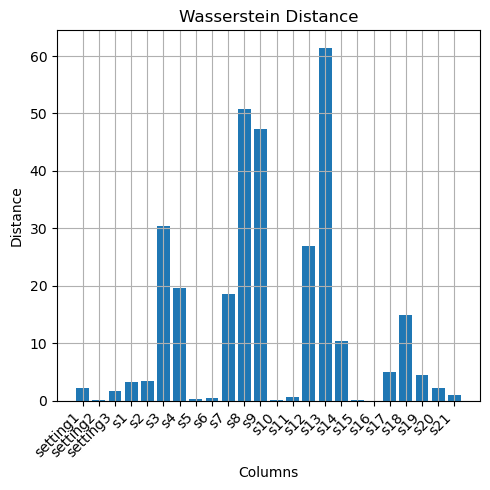

In [45]:
show_n_save(algo_name,'wd',original_df, synthetic_df)

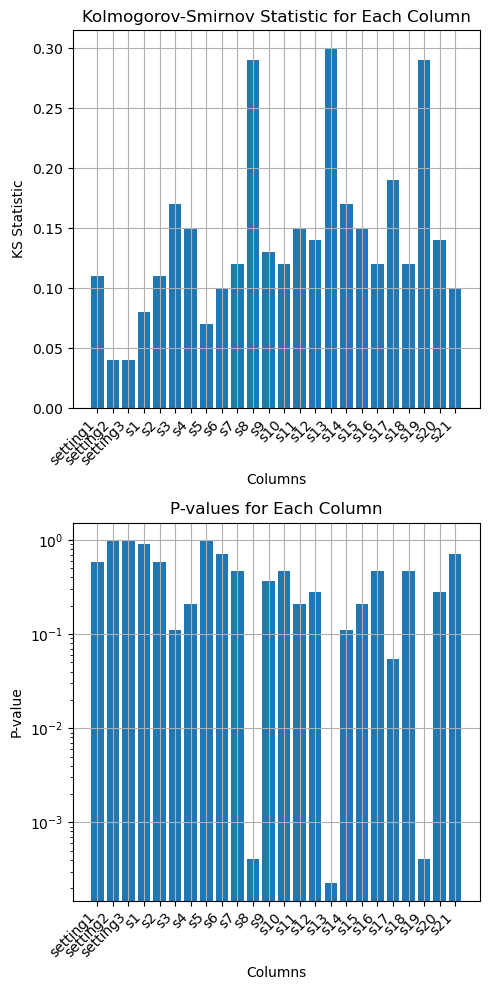

In [46]:
show_n_save(algo_name,'ks_test',original_df, synthetic_df)

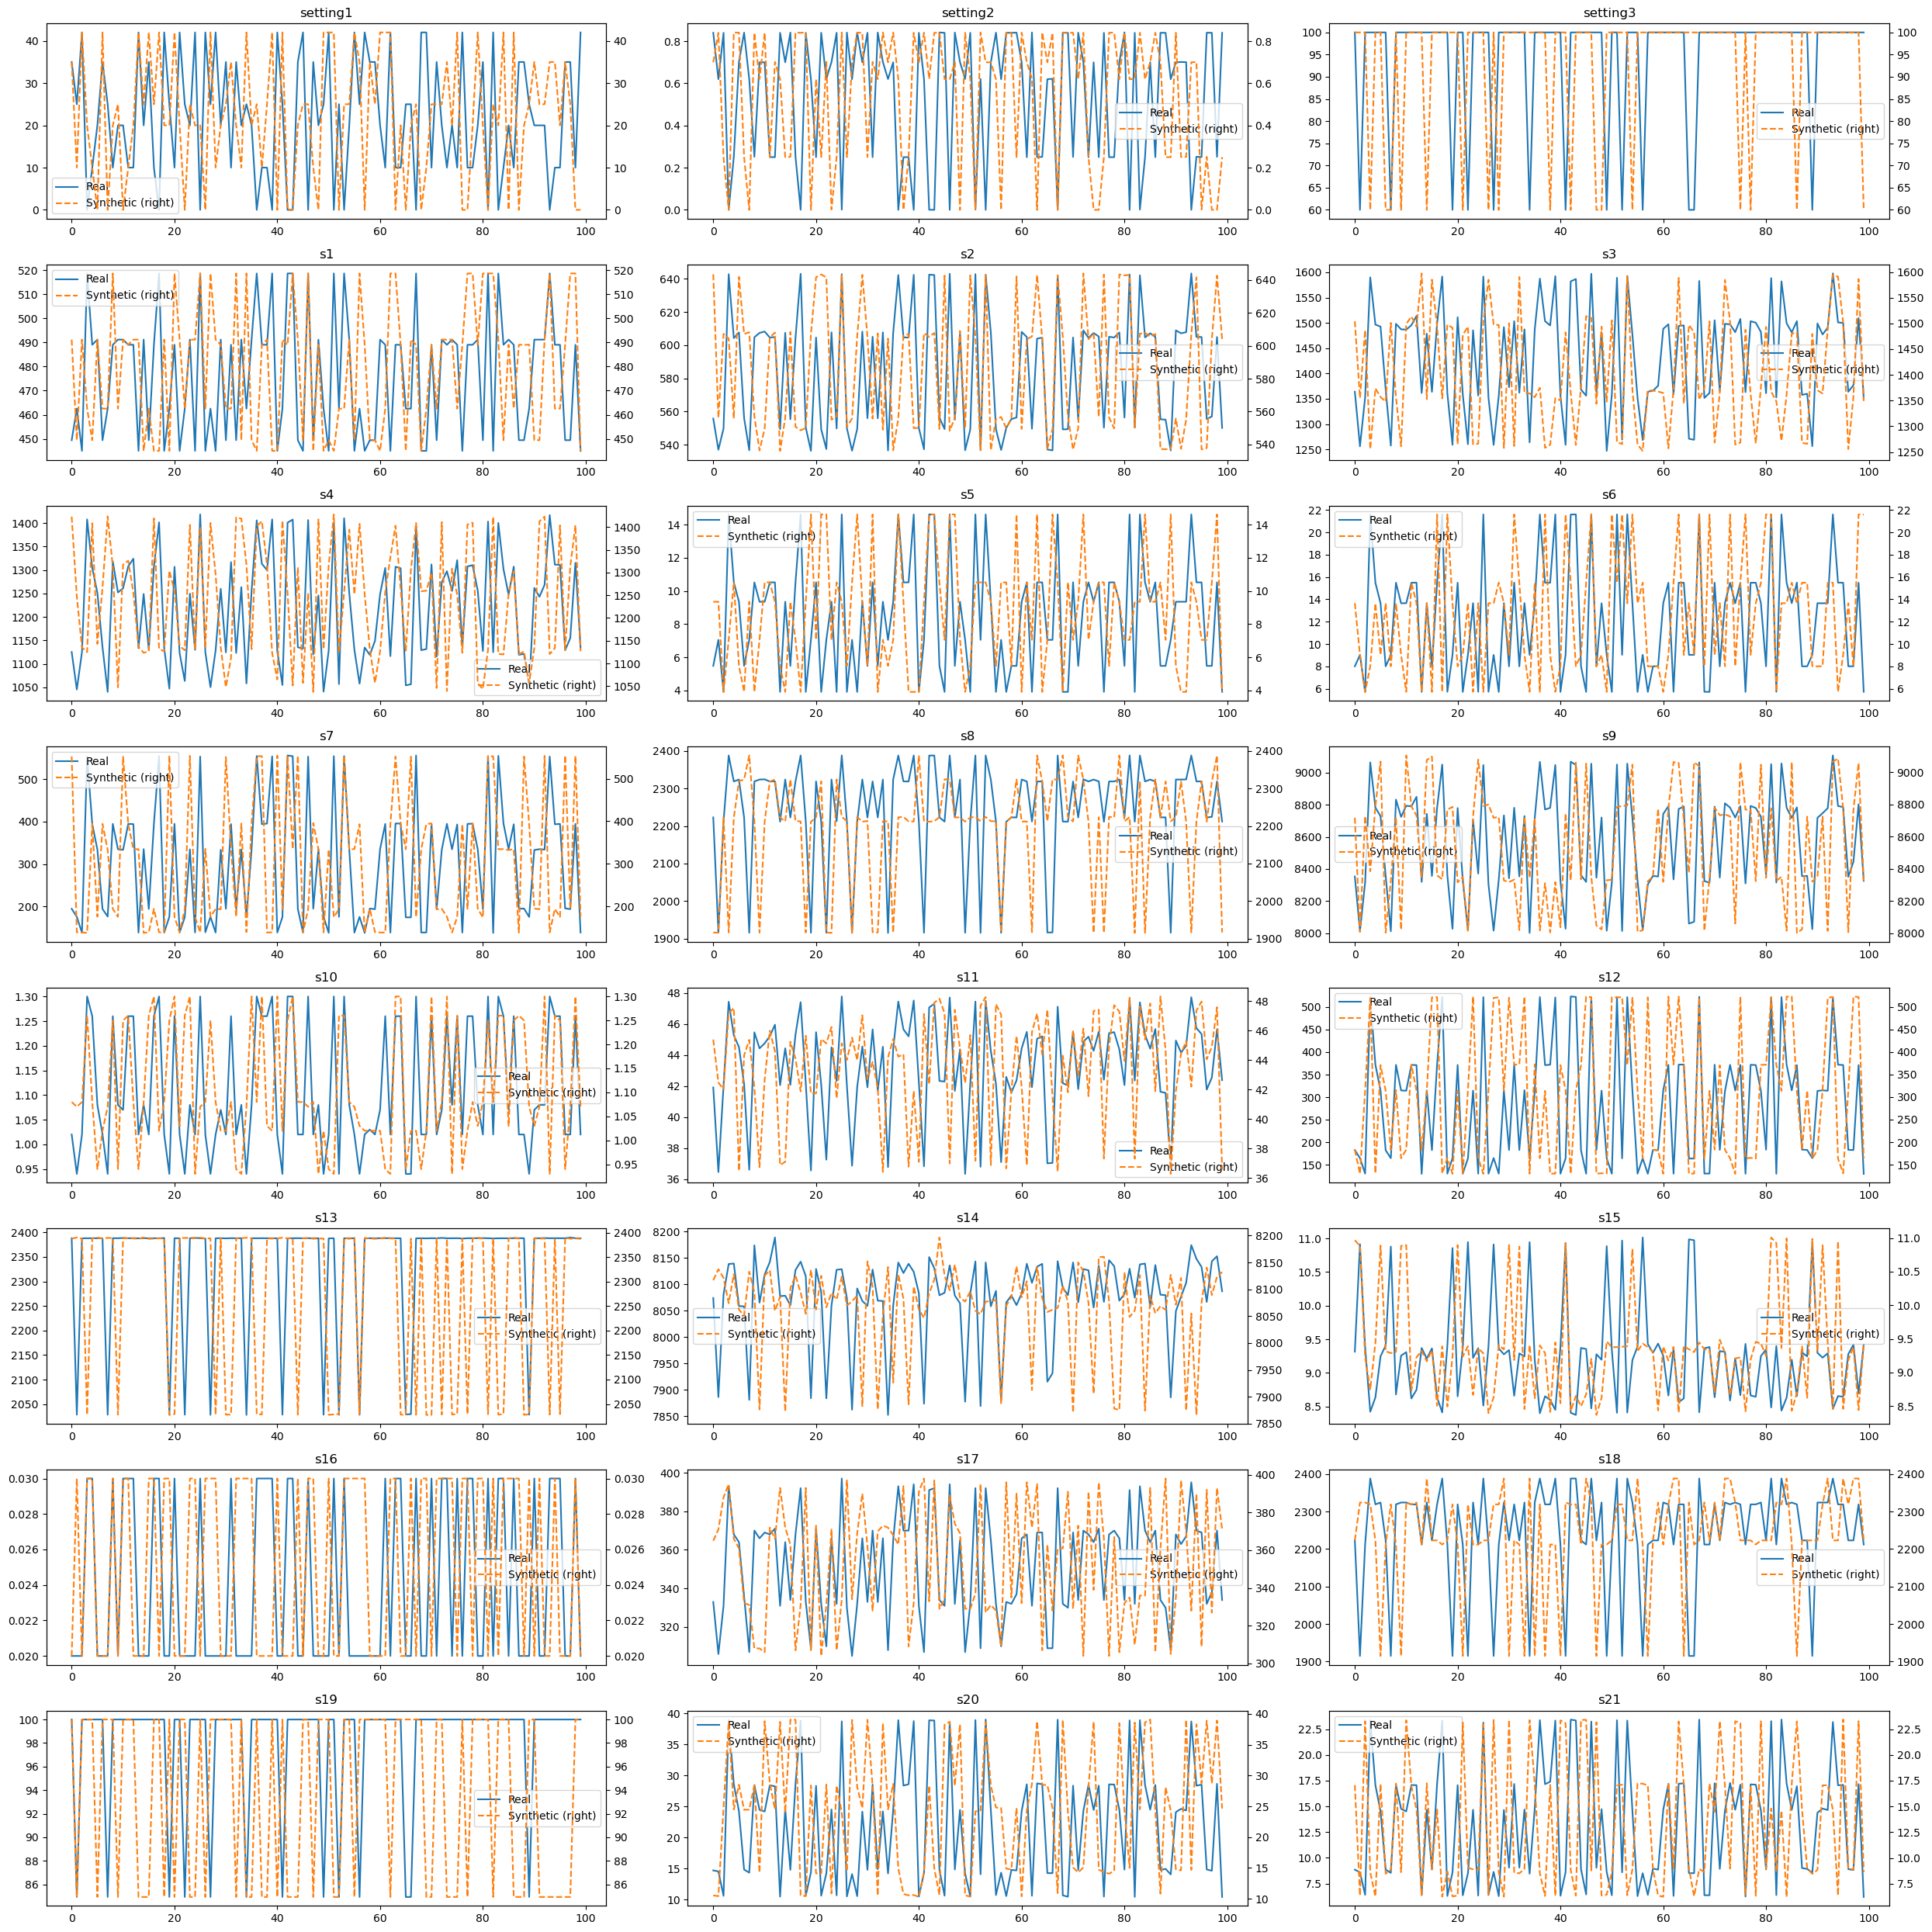

In [47]:
show_n_save(algo_name,'distribs',original_df, synthetic_df)

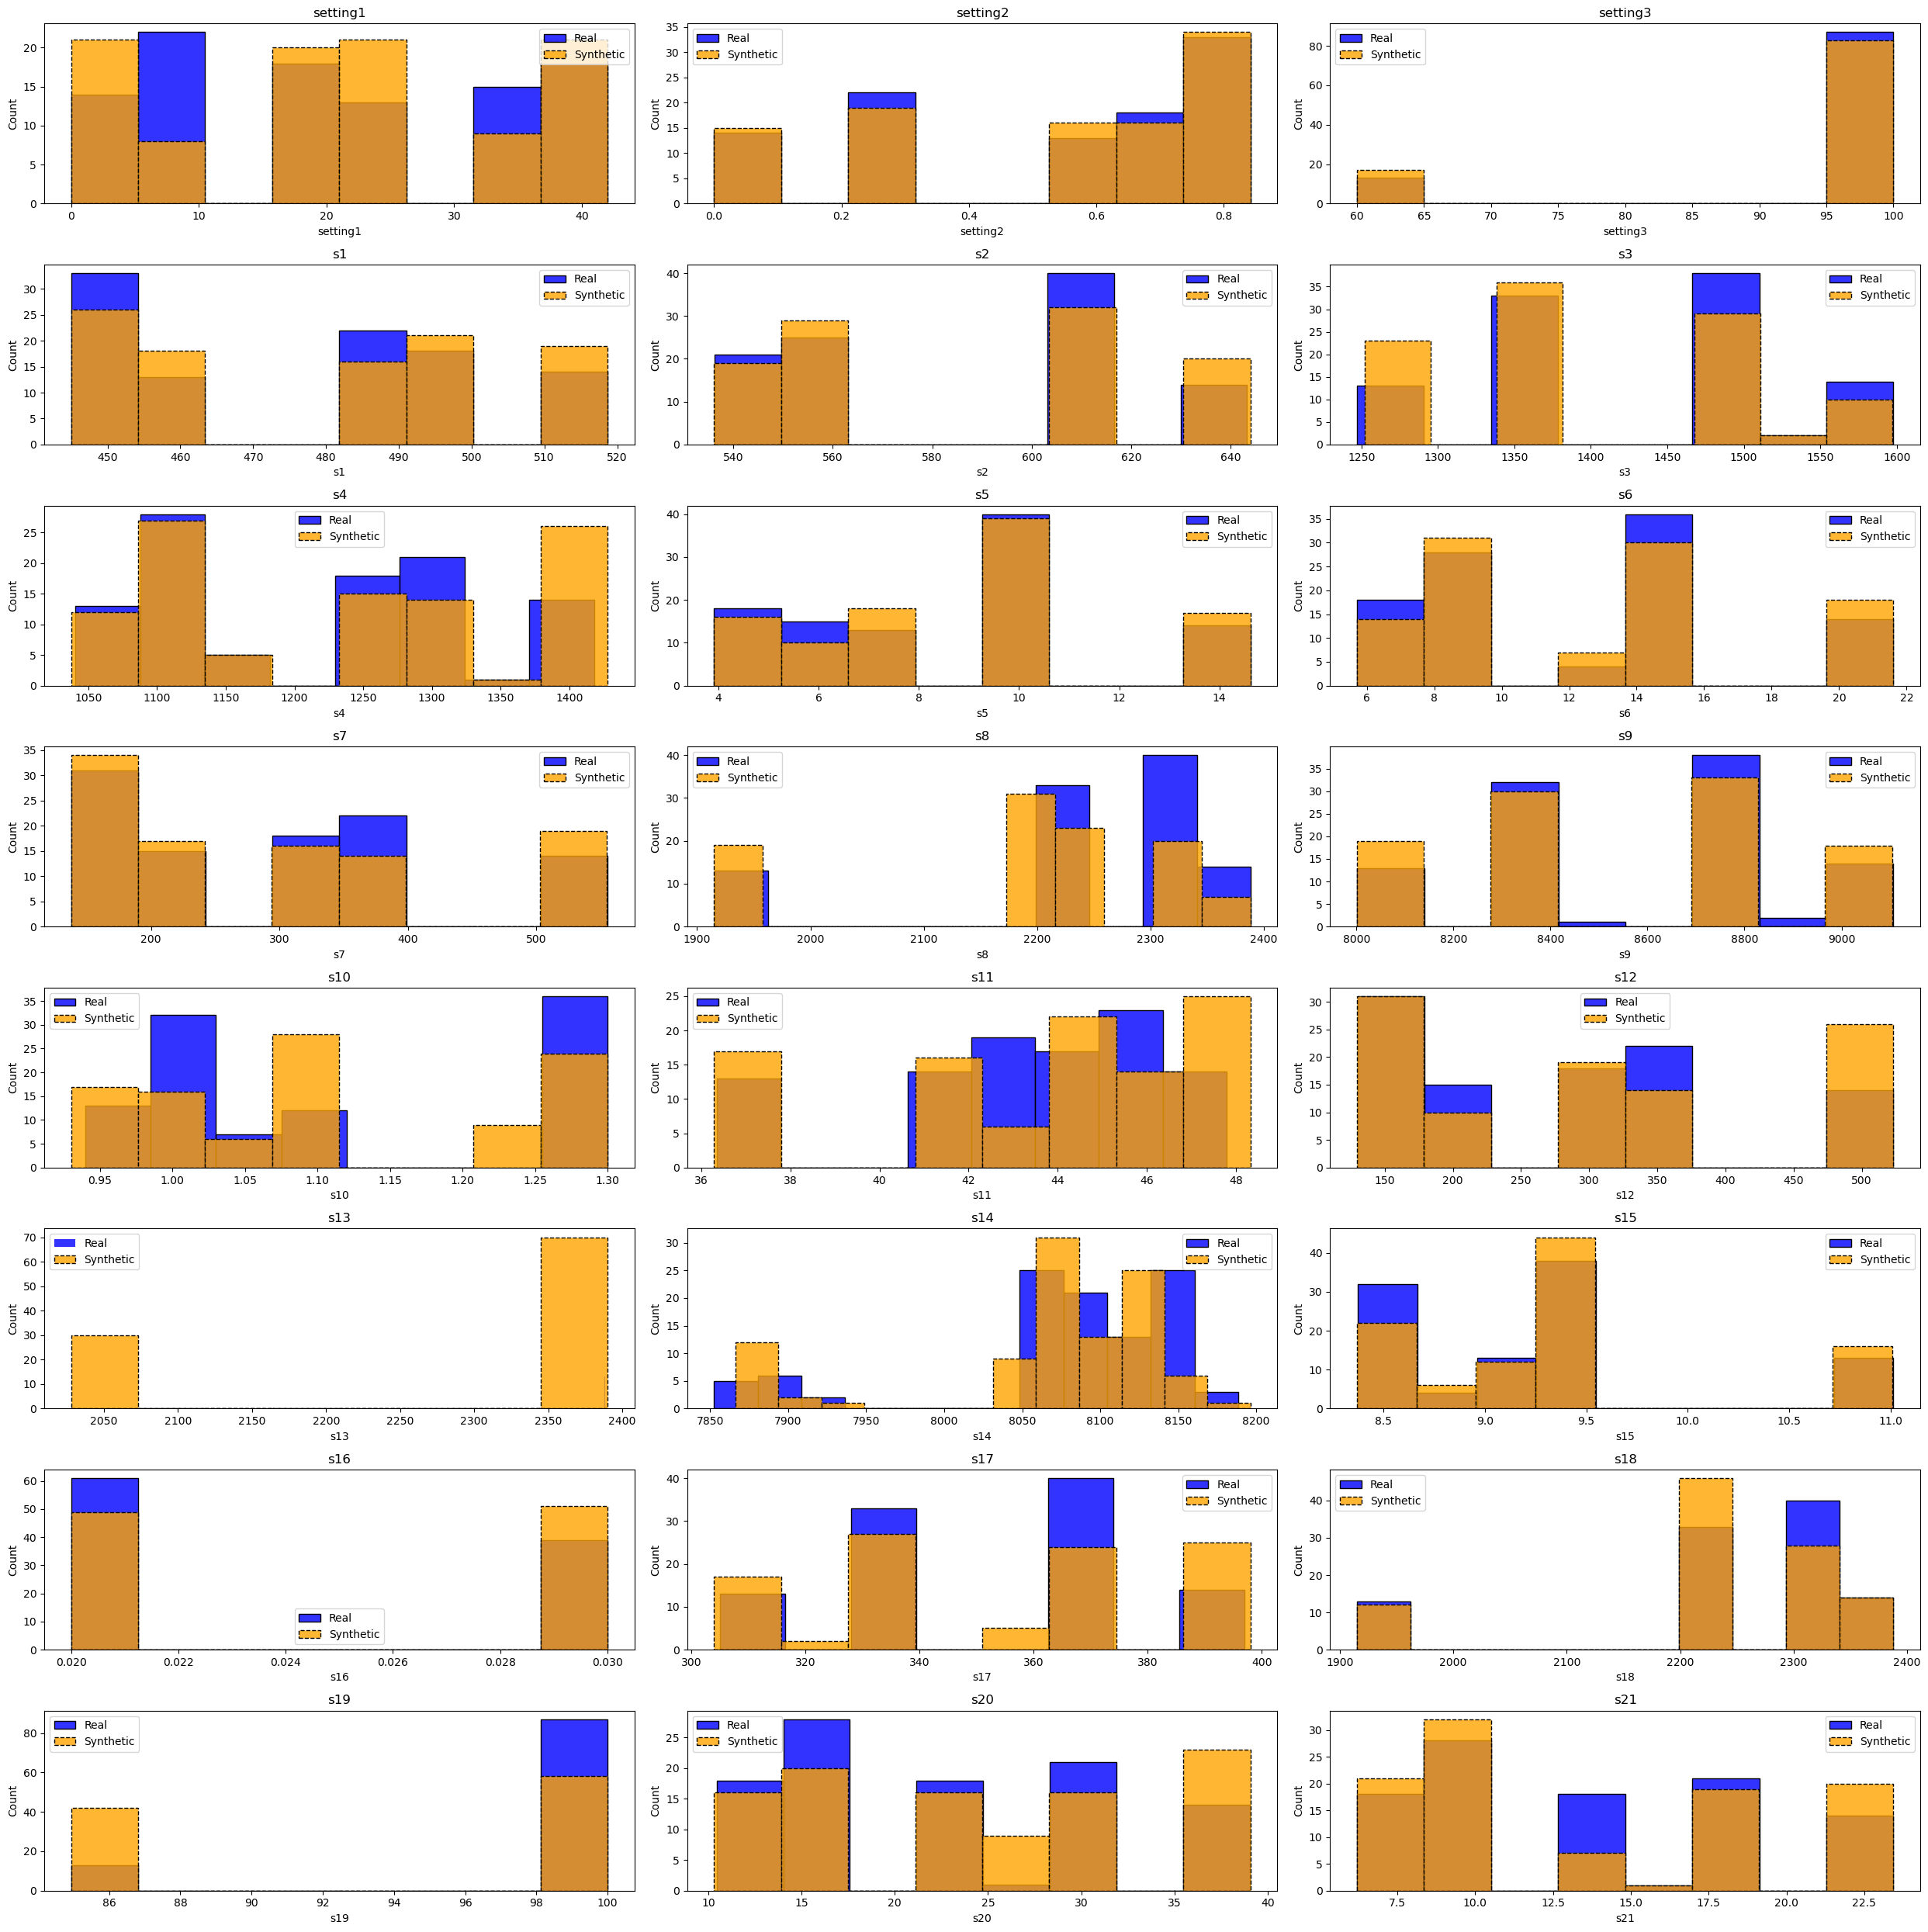

In [48]:
show_n_save(algo_name,'hist',original_df, synthetic_df)

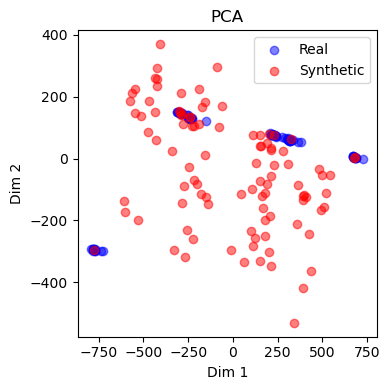

In [49]:
show_n_save(algo_name,'pca',original_df, synthetic_df)

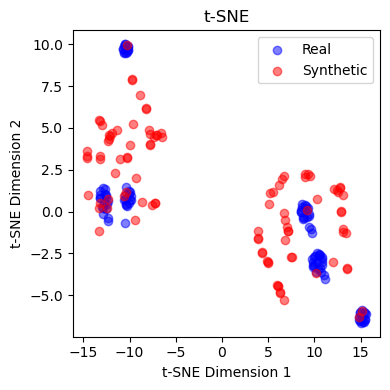

In [50]:
show_n_save(algo_name,'tsne',original_df, synthetic_df)